opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


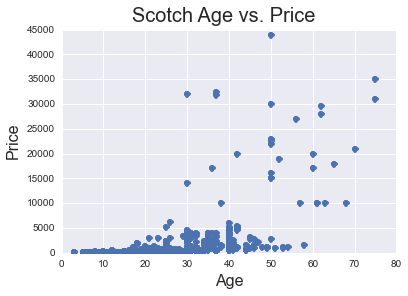

In [242]:
%matplotlib inline
import pprint
from pprint import pprint
import re
import os
from os import listdir
from os.path import isfile, join, walk
import csv
from storm.locals import *
import sqlite3
from collections import Counter
import matplotlib.mlab as mlab
from matplotlib import pyplot as plt
import math
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
from statistics import mean, stdev
from scipy.stats import t
from scipy import stats
import pylab 
from __future__ import division


import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py


class Retailer(object):
    __storm_table__ = "RETAILER"
    RETAILER_ID = Int(primary=True)
    NAME = Unicode()
    TYPE = Unicode()
    CITY = Unicode()
    STATE = Unicode()
    COUNTRY = Unicode()
    SHIPPING_COST = Float()
    ADDITIONAL_COST = Float()
    
      
    def __init__(self, name, retailer_type, city, state, country, shipping_cost, additional_cost):
        # self.RETAILER_ID = int(retailer_id)
        self.NAME = u'' + name
        self.TYPE = u'' + retailer_type
        self.CITY = u'' + city
        self.STATE = u'' + state
        self.COUNTRY = u'' + country
        self.SHIPPING_COST = float(shipping_cost)
        self.ADDITIONAL_COST = float(additional_cost)

    def __str__(self):
        return 'Retailer[ RETAILER_ID = ' + str(self.RETAILER_ID) + ', NAME = ' + self.NAME + ', TYPE = ' + self.TYPE + ', CITY = ' + self.CITY + ', STATE = ' + self.STATE + ', COUNTRY = ' + self.COUNTRY + ', SHIPPING_COST = ' + str(self.SHIPPING_COST) + ', ADDITIONAL_COST = ' +  str(self.ADDITIONAL_COST) + ']'

    
class Distillery(object):
    __storm_table__ = "DISTILLERY"
    DISTILLERY_ID = Int(primary=True)
    NAME = Unicode()
    REGION = Unicode()
      
    def __init__(self, name, region):
        # self.DISTILLERY_ID = int(distillery_id)
        self.NAME = u'' + name
        self.REGION = u'' + region

    def __str__(self):
        return 'Distillery[ DISTILLERY_ID = ' + str(self.DISTILLERY_ID) + ', NAME = ' + self.NAME + ', REGION = ' + self.REGION + ']'

    
class Producer(object):
    __storm_table__ = "PRODUCER"
    PRODUCER_ID = Int(primary=True)
    NAME = Unicode()
      
    def __init__(self, name):
        # self.PRODUCER_ID = int(producer_id)
        self.NAME = u'' + name

    def __str__(self):
        return 'Producer[ PRODUCER_ID = ' + str(self.PRODUCER_ID) + ', NAME = ' + self.NAME + ']'

    
class Scotch(object):
    __storm_table__ = "SCOTCH"
    SCOTCH_ID = Int(primary=True)
    PRODUCER = Int()
    DISTILLERY = Int()
    NAME = Unicode()
    AGE = Int()
    
    def __init__(self, producer, distillery, name, age):
        # self.SCOTCH_ID = int(scotch_id)
        self.PRODUCER = int(producer)
        self.DISTILLERY = int(distillery)
        self.NAME = u'' + name
        self.AGE = int(age)

    def __str__(self):
        return 'Scotch[ SCOTCH_ID = ' + str(self.SCOTCH_ID) + ', PRODUCER = ' + str(self.PRODUCER) + ', DISTILLERY = ' + str(self.DISTILLERY) + ', NAME = ' + self.NAME + ', AGE = ' + str(self.AGE) + ']'

class Price(object):
    __storm_table__ = "PRICE"
    PRICE_ID = Int(primary=True)
    RETAILER = Int()
    SCOTCH = Int()
    PRICE = Float()
    
    def __init__(self, retailer, scotch, price):
        # self.SCOTCH_ID = int(scotch_id)
        self.RETAILER = int(retailer)
        self.SCOTCH = int(scotch)
        self.PRICE = float(price)

    def __str__(self):
        return 'Price[ PRICE_ID = ' + str(self.PRICE_ID) + ', RETAILER = ' + str(self.RETAILER) + ', SCOTCH = ' + str(self.SCOTCH) + ', PRICE = ' + str(self.PRICE) + ']'
    

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

plt.suptitle('Scotch Age vs. Price', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)

plt.plot(age, price, "o")





    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Outliers

When correlating age to price, we can see a pretty tight clustering in the sub-thousand dollar range in the 0-40 range, and tapering off a bit in the 50s. But the outliers really start around the 30 year range. This is where we see our shining stars, dollar-wise.

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
(u'Signatory Vintage Scotch Whisky', u'Glenfarclas', 40, 5249.99, u'Love Scotch')
(u'Tobermory', u'Tobermory', 42, 5250.0, u'Whiskey Shop USA')
(u'Macallan', u'Macallan', 25, 5299.0, u'Binnys')
(u'Tobermory', u'Tobermory', 42, 5499.0, u'Binnys')
(u'Balvenie', u'Balvenie', 40, 6069.95, u'Love Scotch')
(u'Macallan', u'Macallan', 26, 6299.0, u'Binnys')
(u'Gordon & MacPhail', u'Glenlivet', 61, 9999.0, u'Binnys')
(u'Gordon & MacPhail', u'Linkwood', 61, 9999.0, u'Binnys')
(u'Gordon & MacPhail', u'Mortlach', 63, 9999.0, u'Binnys')
(u'Gordon & MacPhail', u'Strathisla', 57, 9999.0, u'Binnys')
(u'Macallan', u'Macallan', 68, 9999.0, u'Binnys')
(u'Bowmore', u'Bowmore', 38, 9999.99, u'Caskers')
(u'Macallan', u'Macallan', 30, 13999.0, u'Binnys')
(u'Glen Grant', u'Glen Grant', 50, 14999.0, u'Binnys')
(u'Glen Grant', u'Glen Grant', 50, 14999.0, u'Caskers')
(u'Highland Park', u'Highland Park', 50, 15999.0, u'Caskers')

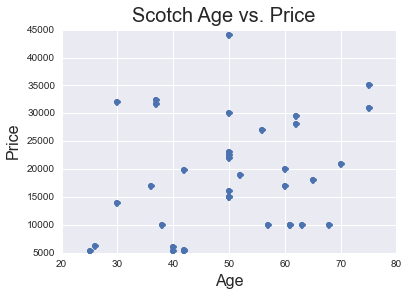

In [111]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE > 5000).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    print str(data[i])

plt.suptitle('Scotch Age vs. Price', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)

plt.plot(age, price, "o")

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


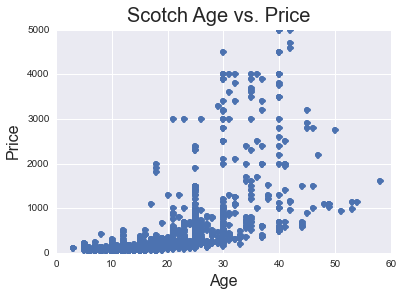

In [115]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 5001).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
plt.plot(age, price, 'o')



plt.suptitle('Scotch Age vs. Price', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Tightening the Range

If we restrict our dollar value to under \$10,000, we start to see a clear pattern emerge.

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


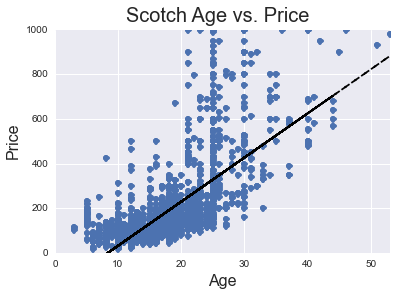

In [102]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 1001).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
fit = np.polyfit(age, price, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

# plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
    

plt.suptitle('Scotch Age vs. Price', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)

plt.plot(age, price, 'o', age, fit_fn(age), '--k')
plt.xlim(0, max(age))
plt.ylim(0, max(price))


    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


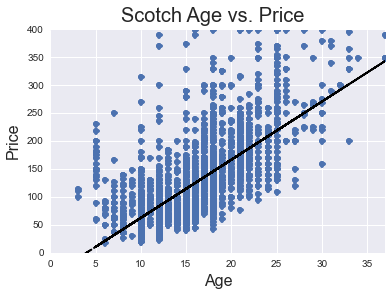

In [103]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 0,
                     Price.PRICE < 401).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    age.append(data[i][2])
    price.append(data[i][3])
    #print str(data[i][2]) + ", " + str(data[i][3])

    
fit = np.polyfit(age, price, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

# plt.plot(x,y, 'yo', x, fit_fn(x), '--k')


plt.suptitle('Scotch Age vs. Price', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)

plt.plot(age, price, 'o', age, fit_fn(age), '--k')
plt.xlim(0, max(age))
plt.ylim(0, max(price))



    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# I'm frugal! What's over 12 years, but under 50 bucks?

In [123]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                     Price.SCOTCH == Scotch.SCOTCH_ID,
                     Price.RETAILER == Retailer.RETAILER_ID,
                     Producer.PRODUCER_ID == Scotch.PRODUCER,
                     Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                     Scotch.AGE > 12,
                     Price.PRICE < 50).order_by(Price.PRICE)
data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

age = []
price = []
for i in range(0, len(data)):
    print '\hline'
    print str(data[i][0]) + ' & ' + str(data[i][1]) + ' & ' + str(data[i][2]) + ' & ' + str(data[i][3]) + ' & ' + str(data[i][4]) + '\\\\'
    
print '[1ex]'
print '\hline'
    

    

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
\hline
Lismore & Unknown Speyside & 15 & 39.99 & Liquorama\\
\hline
Tullibardine & Tullibardine & 14 & 39.99 & Binnys\\
\hline
Lismore & Unknown Speyside & 15 & 39.99 & Hi-Time Wine\\
\hline
Lismore & Unknown Speyside & 15 & 41.95 & Love Scotch\\
\hline
William Maxwell and Co. &  & 18 & 41.98 & Ace Spirits\\
\hline
Glenfiddich & Glenfiddich & 14 & 44.98 & Hi-Time Wine\\
\hline
Glen Moray & Glen Moray & 16 & 44.99 & Binnys\\
\hline
Glenlivet & Glenlivet & 15 & 44.99 & Hi-Time Wine\\
\hline
Tomintoul & Tomintoul & 16 & 44.99 & Ultimate Wine Shop\\
\hline
Lismore & Unknown Speyside & 15 & 44.99 & Wine and Cheese Place\\
\hline
William Lundie and Co. &  & 15 & 48.99 & Ace Spirits\\
\hline
Glenfiddich & Glenfiddich & 14 & 49.99 & Liquorama\\
\hline
Lismore & Unknown Speyside & 18 & 49.99 & Liquorama\\
\hline
Glenlivet & Glenlivet & 15 & 49.99 & Liquorama\\
\hline
Craigellachie & Craigellachie & 13 & 49.99 

# Confidence Intervals by Age

In [126]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

def StudentTCI(mu, sigma, df, alpha=0.95):
    return t.interval(alpha, df, mu, sigma)

for age in range(1, 80):
    print "Age: " + str(age)
    
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    
    price = []
    for i in range(0, len(data)):
        price.append(data[i][3])

    if (len(price) < 2):
        continue
        
    mu = mean(price)
    sigma = stdev(price)
    n = len(price)
    maxPrice = max(price)
    minPrice = min(price)
    
    if (n < 10):
        continue
    print "n = " + str(n)
    print "mu = " + str(mu)
    print "sigma = " + str(sigma)
    print "max = " + str(maxPrice)
    print "min = " + str(minPrice)

    #Studnt, n=999, p<0.05, 2-tail
    #equivalent to Excel TINV(0.05,999)
    # print stats.t.ppf(1-0.025, n)
    
    print "95% confidence of mean price for " + str(age) + ": " + str(StudentTCI(mu, sigma, n))
    print "90% confidence: " + str(age) + ": " + str(StudentTCI(mu, sigma, n, 0.90))

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
Age: 1
Age: 2
Age: 3
Age: 4
Age: 5
n = 21
mu = 155.55047619
sigma = 46.1426121363
max = 229.95
min = 59.0
95% confidence of mean price for 5: (59.591661159908142, 251.50929122104424)
90% confidence: 5: (76.150903839720257, 234.95004854123209)
Age: 6
n = 12
mu = 68.8933333333
sigma = 30.8004933058
max = 129.99
min = 16.99
95% confidence of mean price for 6: (1.7848233587592404, 136.00184330790742)
90% confidence: 6: (13.997997406604057, 123.78866926006259)
Age: 7
n = 23
mu = 87.287826087
sigma = 46.9101202452
max = 249.99
min = 37.95
95% confidence of mean price for 7: (-9.7531511640326158, 184.32880333794566)
90% confidence: 7: (6.889906635448412, 167.68574553846457)
Age: 8
n = 42
mu = 79.505
sigma = 63.591588961
max = 425.0
min = 26.99
95% confidence of mean price for 8: (-48.828021771447908, 207.8380217714479)
90% confidence: 8: (-27.453022871095214, 186.46302287109518)
Age: 9
n = 12
mu = 97.6508333

# Best Bargains by Age

In [91]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

cheap_scotch = []

for age in range(1, 80):
    
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Scotch.AGE > 0).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    price = []
    for i in range(0, len(data)):
        price.append(data[i][3])

    if (len(price) == 0):
        continue
        
    minPrice = min(price)

    # XXX: Looks like this isn't matching on minPrice
    cheap_scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE == minPrice)
    cheapos = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in cheap_scotch_rs]

    if (len(cheapos) == 0):
        continue
    for j in range(0, len(cheapos)):
        cheap_scotch.append(cheapos[j])

for i in range(0, len(cheap_scotch)):
    print str(cheap_scotch[i][2]) + ": " + cheap_scotch[i][0] + ", " + cheap_scotch[i][1] + " - " + str(cheap_scotch[i][3]) + " [" + cheap_scotch[i][4] + "]"

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
3: Kilchoman, Kilchoman - 99.99 [Binnys]
5: James MacArthur, Bunnahabhain - 59.0 [Whiskey Shop USA]
6: Lismore, Lismore - 16.99 [Hi-Time Wine]
7: Signatory Vintage Scotch Whisky,  - 37.95 [Love Scotch]
7: Signatory Vintage Scotch Whisky,  - 37.95 [Love Scotch]
8: Ian Macleod Distillers,  - 26.99 [Hi-Time Wine]
9: Gordon & MacPhail, Miltonduff - 29.99 [Binnys]
10: Speyburn, Speyburn - 18.99 [Hi-Time Wine]
11: Gordon & MacPhail, Bunnahabhain - 49.99 [Beltramos]
11: Hart Brothers, Bowmore - 49.99 [Hi-Time Wine]
12: Glen Ness, Glen Ness - 22.99 [Ace Spirits]
13: Craigellachie, Craigellachie - 49.99 [Astor Wines and Spirits]
13: Craigellachie, Craigellachie - 49.99 [Caskers]
13: Craigellachie, Craigellachie - 49.99 [Hi-Time Wine]
13: Craigellachie, Craigellachie - 49.99 [Wine and Cheese Place]
14: Tullibardine, Tullibardine - 39.99 [Binnys]
15: Lismore, Lismore - 39.99 [Hi-Time Wine]
15: Lismore, Lismore -

# Most expensive by age

In [93]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)


expensive_scotch = []

for age in range(1, 80):
    
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Scotch.AGE > 0).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    price = []
    for i in range(0, len(data)):
        price.append(data[i][3])

    if (len(price) == 0):
        continue
        
    maxPrice = max(price)

    # XXX: Looks like this isn't matching on minPrice
    expensive_scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE == maxPrice)
    expensives = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in expensive_scotch_rs]

    if (len(expensives) == 0):
        continue
    for j in range(0, len(expensives)):
        expensive_scotch.append(expensives[j])

for i in range(0, len(expensive_scotch)):
    print str(expensive_scotch[i][2]) + ": " + expensive_scotch[i][0] + ", " + expensive_scotch[i][1] + " - " + str(expensive_scotch[i][3]) + " [" + expensive_scotch[i][4] + "]"

    
scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
3: Bruichladdich, Bruichladdich - 114.95 [Love Scotch]
5: Bruichladdich, Bruichladdich - 229.95 [Love Scotch]
6: Bruichladdich, Bruichladdich - 129.99 [D&M]
7: Bruichladdich, Bruichladdich - 249.99 [Binnys]
8: Macallan, Macallan - 425.0 [Love Scotch]
9: Springbank, Springbank - 148.95 [Love Scotch]
10: Bruichladdich, Bruichladdich - 314.95 [Love Scotch]
11: Gordon & MacPhail, Mortlach - 170.0 [Whiskey Shop USA]
12: Glendronach, Glendronach - 500.0 [Love Scotch]
13: Signatory Vintage Scotch Whisky, Glen Grant - 184.5 [Whiskey Shop USA]
13: Signatory Vintage Scotch Whisky, Glen Grant - 184.5 [Whiskey Shop USA]
14: Caol Ila, Caol Ila - 199.99 [Hi-Time Wine]
15: Laphroaig, Laphroaig - 375.0 [Love Scotch]
16: Scotch Malt Whisky Society,  - 500.0 [Love Scotch]
17: Springbank, Springbank - 1100.0 [Hi-Time Wine]
18: Macallan, Macallan - 1999.99 [K&L Wines]
19: Ardbeg, Ardbeg - 670.0 [Whiskey Shop USA]
20: Mac

# Distributions of Age (< $1000)

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
Percentage of 10 year olds: 10.9658678286
Percentage of 12 year olds: 17.2839506173
Percentage of 15 year olds: 8.60566448802
Percentage of 18 year olds: 11.0748002905
Percentage of 21 year olds: 7.37109658678
Percentage of 25 year olds: 4.90196078431
Percentage of 30 year olds: 1.70660856935


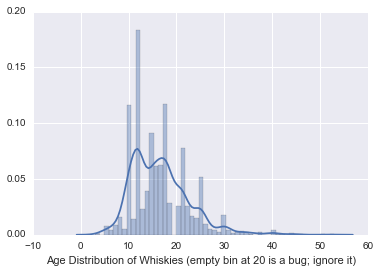

In [223]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

def StudentTCI(mu, sigma, df, alpha=0.95):
    return t.interval(alpha, df, mu, sigma)


age_count = []
price_count = []
tenYearOlds = 0
twelveYearOlds = 0
fifteenYearOlds = 0
eighteenYearOlds = 0
twentyOneYearOlds = 0
twentyFiveYearOlds = 0
thirtyYearOlds = 0
for age in range(1, 80):
        
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    
    for i in range(0, len(data)):
        age_count.append(age)
        if (age == 10):
            tenYearOlds += 1
        if (age == 12):
            twelveYearOlds += 1
        if (age == 15):
            fifteenYearOlds += 1
        if (age == 18):
            eighteenYearOlds += 1
        if (age == 21):
            twentyOneYearOlds += 1
        if (age == 25):
            twentyFiveYearOlds += 1
        if (age == 30):
            thirtyYearOlds += 1
        price_count.append(round(data[i][3]))


print "Percentage of 10 year olds: " + str( float((tenYearOlds / len(age_count)) * 100) )
print "Percentage of 12 year olds: " + str( float((twelveYearOlds / len(age_count)) * 100) )
print "Percentage of 15 year olds: " + str( float((fifteenYearOlds / len(age_count)) * 100) )
print "Percentage of 18 year olds: " + str( float((eighteenYearOlds / len(age_count)) * 100) )
print "Percentage of 21 year olds: " + str( float((twentyOneYearOlds / len(age_count)) * 100) )
print "Percentage of 25 year olds: " + str( float((twentyFiveYearOlds / len(age_count)) * 100) )
print "Percentage of 30 year olds: " + str( float((thirtyYearOlds / len(age_count)) * 100) )
sns.distplot(age_count, bins=max(age_count), axlabel="Age Distribution of Whiskies (empty bin at 20 is a bug; ignore it)");
#sns.distplot(price_count);

scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Distributions of Price (< $1000)

When modeled as a normal distribution, price skews greatly to the right. It is better modeled as a log-normal distribution.

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


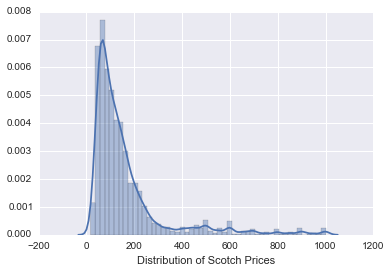

In [226]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

def StudentTCI(mu, sigma, df, alpha=0.95):
    return t.interval(alpha, df, mu, sigma)


age_count = []
price_count = []
for age in range(1, 80):
        
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    for i in range(0, len(data)):
        age_count.append(age)
        price_count.append(data[i][3])
        price_count_ln.append(math.log(round(data[i][3])))
    
sns.distplot(price_count, axlabel="Distribution of Scotch Prices");
#sns.distplot(price_count_ln);

scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Price as a Log-Normal Distribution

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


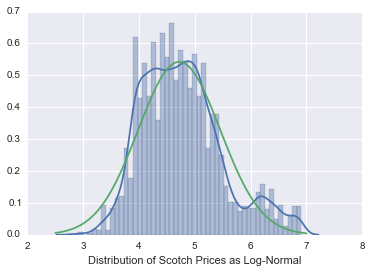

In [245]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

def StudentTCI(mu, sigma, df, alpha=0.95):
    return t.interval(alpha, df, mu, sigma)


age_count = []
price_count = []
for age in range(1, 80):
        
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    for i in range(0, len(data)):
        age_count.append(age)
        price_count.append(data[i][3])
        price_count_ln.append(math.log(round(data[i][3])))
    
#sns.distplot(price_count, axlabel="Distribution of Scotch Prices as Log-Normal");
sns.distplot(price_count_ln, axlabel="Distribution of Scotch Prices as Log-Normal");

mean = 4.72149661207
variance = 0.54098677141
sigma = math.sqrt(variance)
x = np.linspace(2.5,7,100)
plt.plot(x,mlab.normpdf(x,mean,sigma))


scotch_store.flush()
scotch_store.commit()
scotch_store.close()

# Point Estimates

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db
---------------------------------- Ages
Count of ages: 2754
Mean of ages: 15.5803551088
Median of ages: 16.0
Variance of ages: 36.7865738861
St. Dev. of ages: 6.06409237885
Skewness of ages: 1.1550691062
Kurtosis of ages: 2.53925315938
Entropy of ages: 7.85802266049
---------------------------------- Prices
Count of prices: 2754
Mean of prices: 118.609875391
Median of prices: 110.0
Variance of prices: 26751.3388123
St. Dev. of prices: 163.528667767
Skewness of prices: 2.74630619137
---------------------------------- Prices (Log-Normal)
Count of prices: 2754
Mean of prices: 4.72149661207
Median of prices: 4.70048036579
Variance of prices: 0.54098677141
St. Dev. of prices: 0.735384480849
Skewness of prices: 0.665588723528
---------------------------------- Prices (Log-Normal exp)
Count of prices: 2754
Mean of prices: 112.336250711
Median of prices: 110.0
Variance of prices: 1.71770100442
St. Dev. of pri

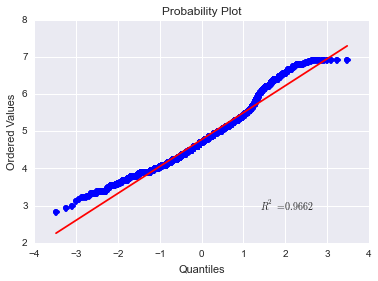

In [247]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

def StudentTCI(mu, sigma, df, alpha=0.95):
    return t.interval(alpha, df, mu, sigma)


age_count = []
price_count = []
price_count_ln = []
for age in range(1, 80):
        
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    for i in range(0, len(data)):
        age_count.append(age)
        price_count.append(round(data[i][3]))
        price_count_ln.append(math.log(round(data[i][3])))

print "---------------------------------- Ages"
print "Count of ages: " + str(len(age_count))
print "Mean of ages: " + str(stats.gmean(age_count))
print "Median of ages: " + str(np.nanmedian(age_count))
print "Variance of ages: " + str(stats.tvar(age_count))
print "St. Dev. of ages: " + str(np.nanstd(age_count))
print "Skewness of ages: " + str(stats.skew(age_count))
print "Kurtosis of ages: " + str(stats.kurtosis(age_count))
print "Entropy of ages: " + str(stats.entropy(age_count))

print "---------------------------------- Prices"
print "Count of prices: " + str(len(price_count))
print "Mean of prices: " + str(stats.gmean(price_count))
print "Median of prices: " + str(np.nanmedian(price_count))
print "Variance of prices: " + str(stats.tvar(price_count))
print "St. Dev. of prices: " + str(np.nanstd(price_count))
print "Skewness of prices: " + str(stats.skew(price_count))


print "---------------------------------- Prices (Log-Normal)"
print "Count of prices: " + str(len(price_count_ln))
print "Mean of prices: " + str(stats.gmean(price_count_ln))
print "Median of prices: " + str(np.nanmedian(price_count_ln))
print "Variance of prices: " + str(stats.tvar(price_count_ln))
print "St. Dev. of prices: " + str(np.nanstd(price_count_ln))
print "Skewness of prices: " + str(stats.skew(price_count_ln))



print "---------------------------------- Prices (Log-Normal exp)"
print "Count of prices: " + str(len(price_count_ln))
print "Mean of prices: " + str(math.exp(stats.gmean(price_count_ln)))
print "Median of prices: " + str(math.exp(np.nanmedian(price_count_ln)))
print "Variance of prices: " + str(math.exp(stats.tvar(price_count_ln)))
print "St. Dev. of prices: " + str(math.exp(np.nanstd(price_count_ln)))
print "Skewness of prices: " + str(math.exp(stats.skew(price_count_ln)))

mean_ln = 0.0
for i in range(0, len(price_count)):
    mean_ln += (math.log(price_count[i]) / len(price_count))
    
var_ln = 0.0
for i in range(0, len(price_count)):
    var_ln += (math.pow(math.log(price_count[i]) - mean_ln, 2) / len(price_count))
print "Point Estimate for mu_LN = " + str(mean_ln)
print "Point Estimate for var_LN = " + str(var_ln)
print "Point Estimate for stdev_LN = " + str(math.sqrt(var_ln))

# print "Anderson-Darling test for data coming from a Normal distribution: " + str(stats.anderson(price_count_ln))

fig = plt.figure()
#ax = fig.add_subplot(111)
stats.probplot(price_count_ln, plot=plt) #, dist=stats.loggamma, sparams=(2.5,), plot=ax)
# ax.set_title("Probplot for loggamma dist with shape parameter 2.5")
# Show the results with Matplotlib:
plt.show()
# stats.probplot(price_count)


#stats.probplot(price_count_ln, dist="norm", plot=pylab)
#pylab.show()

scotch_store.flush()
scotch_store.commit()
scotch_store.close()

opening /home/bdetweiler/src/Data_Science/math-8756-final-project/db/scotch_prices.db


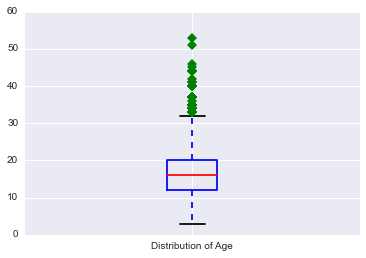

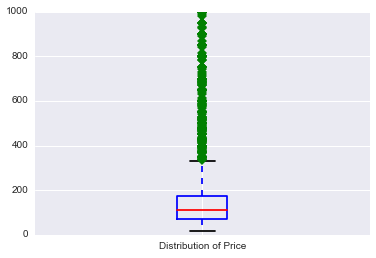

In [238]:

MATH_8756_HOME = os.environ.get('MATH_8756_HOME')
DB_DIR = MATH_8756_HOME + '/' + 'db'
DB = DB_DIR + '/scotch_prices.db'

# This is what we're trying to populate

print 'opening ' + DB
# conn = sqlite3.connect(DB)
scotch_db = create_database('sqlite:' + DB)
scotch_store = Store(scotch_db)

#scotch_join = [(Scotch, Price), Price.SCOTCH == Scotch.SCOTCH_ID]
#scotch_rs = scotch_store.using(*scotch_join).find(Scotch, Scotch.AGE > 0).order_by(Price.PRICE)

def StudentTCI(mu, sigma, df, alpha=0.95):
    return t.interval(alpha, df, mu, sigma)


age_count = []
price_count = []
price_count_ln = []
for age in range(1, 80):
        
    scotch_rs = scotch_store.find((Scotch, Price, Producer, Distillery, Retailer),
                         Price.SCOTCH == Scotch.SCOTCH_ID,
                         Price.RETAILER == Retailer.RETAILER_ID,
                         Producer.PRODUCER_ID == Scotch.PRODUCER,
                         Distillery.DISTILLERY_ID == Scotch.DISTILLERY,
                         Scotch.AGE == age,
                         Price.PRICE < 1000).order_by(Price.PRICE)
    data = [(producer.NAME, distillery.NAME, scotch.AGE, price.PRICE, retailer.NAME) for scotch, price, producer, distillery, retailer in scotch_rs]

    for i in range(0, len(data)):
        age_count.append(age)
        price_count.append(round(data[i][3]))
        price_count_ln.append(math.log(round(data[i][3])))

        

fig = plt.figure()
#ax = fig.add_subplot(111)
#stats.probplot(price_count_ln, plot=plt) #, dist=stats.loggamma, sparams=(2.5,), plot=ax)
plt.boxplot(age_count, 0, 'gD', labels=["Distribution of Age"])

fig = plt.figure()
#ax = fig.add_subplot(111)
#stats.probplot(price_count_ln, plot=plt) #, dist=stats.loggamma, sparams=(2.5,), plot=ax)
plt.boxplot(price_count, 0, 'gD', labels=["Distribution of Price"])



#stats.probplot(price_count_ln, dist="norm", plot=pylab)
#pylab.show()

scotch_store.flush()
scotch_store.commit()
scotch_store.close()

